# DBSCAN Clustering for Target Company Stores
1. Load the data set.
2. Indentify the Clustering factors
    a. Epsilon factor
    b. Distance between data points.
3. Apply DBSCAN clustering.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_target1 = pd.read_csv("targets.csv",encoding='ISO-8859-1')
# df_target2 = pd.read_csv("target.csv",encoding='ISO-8859-1')

In [7]:
df_target1.head()

,@locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,Is24Hours Sat,IsOpen Sat,Summary Sat,ThruTime Sat,BeginTime Sun,Is24Hours Sun,IsOpen Sun,Summary Sun,ThruTime Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."


In [9]:
list(df_target1)

['@locale',
 'Address.AddressLine1',
 'Address.AddressLine2',
 'Address.City',
 'Address.CountryName',
 'Address.County',
 'Address.FormattedAddress',
 'Address.IntersectionDescription',
 'Address.Latitude',
 'Address.Longitude',
 'Address.PostalCode',
 'Address.Subdivision',
 'AlternateIdentifier.ID',
 'ID',
 'IsDaylightSavingsTimeRecognized',
 'LocationMilestones.LastRemodelDate',
 'LocationMilestones.OpenDate',
 'Market',
 'Name',
 'OperatingHours.@timeFormat',
 'Store.StoreDistrictID',
 'Store.StoreGroupID',
 'Store.StoreRegionID',
 'SubTypeDescription',
 'TimeZone.TimeZoneCode',
 'TimeZone.TimeZoneDescription',
 'TimeZone.TimeZoneOffset.OffsetCode',
 'TimeZone.TimeZoneOffset.OffsetHours',
 'TypeCode',
 'PhoneNumber',
 'FaxNumber',
 'BeginTime MF',
 'Is24Hours MF',
 'IsOpen MF',
 'Summary MF',
 'ThruTime MF',
 'BeginTime Sat',
 'Is24Hours Sat',
 'IsOpen Sat',
 'Summary Sat',
 'ThruTime Sat',
 'BeginTime Sun',
 'Is24Hours Sun',
 'IsOpen Sun',
 'Summary Sun',
 'ThruTime Sun',
 'AllCa

In [13]:
geo_coordinates = df_target1[['Address.Latitude','Address.Longitude']].values

In [14]:
geo_coordinates

array([[ 33.608825, -85.783182],
       [ 32.618108, -85.410636],
       [ 33.55892 , -85.076473],
       ...,
       [ 29.846426, -97.970298],
       [ 30.011692, -97.864363],
       [ 30.162592, -97.793568]])

In [12]:
# within 100 km
kms_per_radian = 6371.0088
epsilon = 300 / kms_per_radian
epsilon

0.04708830413167849

In [29]:
db = DBSCAN(eps = epsilon,
             min_samples = 3,
             algorithm = 'brute',
             metric = 'haversine').fit(np.radians(geo_coordinates))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
set(cluster_labels)

{0, 1, 2}

In [30]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
df_target1['clabels'] = cluster_labels

In [32]:
df_target1.head()

,@locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,IsOpen Sat,Summary Sat,ThruTime Sat,BeginTime Sun,Is24Hours Sun,IsOpen Sun,Summary Sun,ThruTime Sun,AllCapability,clabels
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star...",0
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'...",0
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN,0
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob...",0
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot...",0


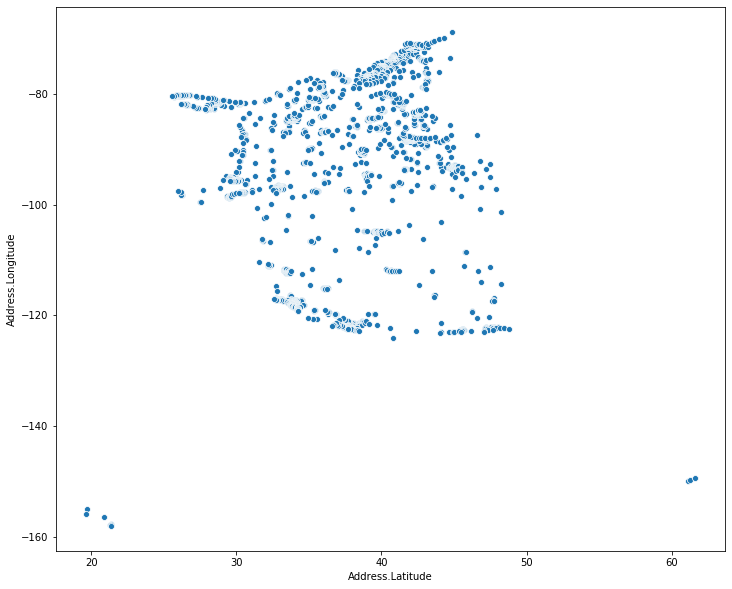

In [33]:
plt.figure(figsize=(12,10))
import seaborn as sns
ax = sns.scatterplot(x="Address.Latitude", y="Address.Longitude", data=df_target1[['Address.Latitude','Address.Longitude']])

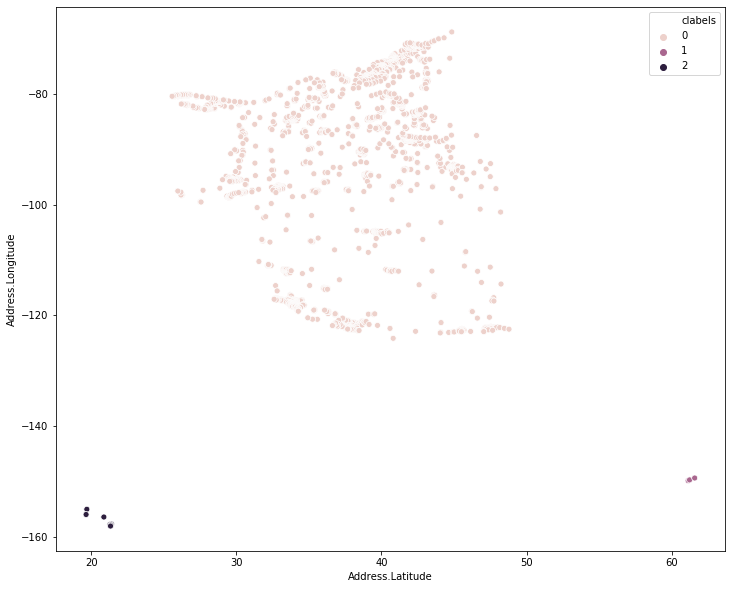

In [34]:
#Clustered Labelled data view
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x="Address.Latitude", 
                     y="Address.Longitude", 
                     hue="clabels",
                     data=df_target1)